## Stabilizing the variance: Estabilizacion de varianza.
Si la varianza hace el proceso no estacionario toca estabilizarla
con el objeto de que el proceso sea estacionario. 

En las notas tengo la referencia historia de 1947 de M.S. Bartlett. Fue el introdujo el metodo que exponemos aca.

Asumamimos

$$\mathbb{V}[X_t] = f(\mu_t)  .$$

Stabilizing: volverla estacionaria en la varianza.

Las ideas se basan en un expansion de Taylor lineal.

Asumamos una funcion de $X_t$, $g=g(X_t)$ tal que

$$Y_t = g(X_t) \approx g(\mu_t) + g'(\mu_t) (X_t - \mu_t)  .  $$

Si tomamos la media y la varianza de esta expresion econtramos

$$ \mathbb{E}[Y_t] = \mathbb{E}[g(\mu_t)] + \mathbb{E}[ g'(\mu_t) (X_t - \mu_t)] $$

Dado que $\mathbb{E}[X_t]=\mu_t$, tenemos

$$\mathbb{E}[Y] = g(\mu_t) \quad y \quad     \mathbb{V}[Y]= [g'(\mu_t)]^2 f(\mu_t).$$

Que queremos? Queremos que la varianza de la nueva funcion (variable) aleatoria $Y$ sea constante. Es decir que
$\mathbb{V}[Y] = C$. Como hacemos esto.
De la ultima ecuacion tenderiamos

$$C = [g'(\mu_t)]^2 f(\mu_t) .$$
Debemos despejar $g(\mu_t)$ para resolver nuestro. Quien es $f$? debemos hacer suposiciones de quien es $f$.  Esta es una ecuacion diferencial ordinaria, se resuleve como

$$ \frac{dg}{d \mu_t} =\frac{\sqrt{C}}{{\sqrt{f(\mu_t)}}}. $$
Para hallar $g$ debemos integrar

$$ g(\mu_t) = \int \frac{C d \mu_t}{\sqrt{f(\mu_t)}}$$
mas una constante que por ahora no nos interesa. Por que esa constante es un "drift" $c$ que no importa. Si se le suma una constante a una funcion de varianza 0 sigue siendo una funcion de varianza 0. Si la media es constante y le suma una constante sigue siendo constante y la variable es estacionari.

Formamos las siguientes hipotesis acerca de $f$.

* Asumamos que la varianza de $X_t$ es proporcional al nivel cuadrado $\mu_t$. Es decir $\mathbb{v}[X_t] = k \mu_t^2$. Entonces
Usamos calculo

$$g(\mu_t) = \int \frac{C d \mu_t}{\sqrt{k \mu_t^2}}= \frac{C}{\sqrt{k}} \int \frac{1}{\mu_t} d \mu_t = K \ln (\mu_t)  $$
donde $K=C/\sqrt{k}$. 

*Asumimos que la vairanza de $X_t$ es proporcional a $\mu_t$, es decir
$\mathbb{V}[\mu_t] = k \mu_t$. 


$$g(\mu_t) = \int \frac{C d \mu_t}{\sqrt{k \mu_t}}= \frac{C}{\sqrt{k}} \int \frac{1}{\sqrt{\mu_t}} d \mu_t = 2 K \sqrt{\mu_t}  $$
donde $K=C/\sqrt{k}$. 

De aca sale el que a veces se use la raiz cuardrada para convertir una serie de tiempo de no estacionaria estacionaria en varianza (estbilize).   $g(X_t)=\sqrt{X_t}$.

* Que pasa si la desviacion estandard es proporcional con el cuadrado (la varianza con la cuarta potencia).  
$ \mathbb{V}[X_t]= c \mu_t^4$. 

$$ g(\mu_t) = \int  K \frac{1}{\sqrt{c \mu_t^4}} d\mu_t = \frac{C}{\sqrt{c}} \int \frac{1}{\mu_t^2} dt = -K \frac{1}{\mu_t} $$
donde $K=C\sqrt{c}$. 

Box and Cox, [3] (referencia 3 en las notas de clase, 1964)
Definieron una transformacion "generalizada" para todo esto.

$$ T(X_t) = \frac{X_t^{\lambda} -1 }{\lambda}.$$
Por que esto funcionaria. Si se usa la regla de L'Hopital para tomar el limite. Vemos que $\lim_{\lambda_0} T(X_t) = \ln X_t$. 

Veamoslo como un ejercicio de calculo

$$ X_t^{\lambda} = \exp( \lambda \ln X_t) .$$

en el numerador, recuerde $D1=0$. 
$$ \frac{d X_t^{\lambda}}{d \lambda} = X_t^{\lambda} \ln X_t.$$
en el denominador $d \lambda/ d \lambda = 1$. 

De forma que en el limite tenemos: $ \ln X_t$. 
Que pasa con $\lambda=-1$.

$$ T(X_t) = -\frac{1}{X_t} + 1 $$
la constatante no importa y recuperamos $-1/X_t$. 
Que pasa si $\lambda=1/2$. Observe que si $\lambda=1/2$
(excepto por constantes ) estamos llegando al operador raiz cuadrada.


Pero Box and Cox simplificaron mas el problema.

\begin{eqnarray}
T(X_t) =  \left \{
    \begin{array}{cc}
    X_t^{\lambda} & \lambda \ne 0 \\
    \ln X_t & \lambda = 0 
    \end{array}
    \right .
\end{eqnarray}

En la practica se usan valores en un barrido $\lambda=-5,-4.5, -4, -3.5, \cdots, 4.5, 5$ y se analiza cual es el mejor modelo
(el tiene menor variabilidad en la varianza). 

En resumen:

* Halla el $\lambda$ ideal que minimize el cambio en la varianza, con barrido de $\lambda$s. 
* Se transforman los datos con la transformacion $T$.
* Se usan los metodos ya estudiados que solo funcionan para series estacionarias.
* Si toca recuperar la senal orignal, se hacen inversas. En el caso de logaritmo se usa la exponencial, en el caso de $X_t^{\lambda}$ se usa $X_t^{-\lambda}$. 

Vamos a los ejemplos en Python. Pensemos en las acciones de
NASDAQ (National Association of Securities Dealers Automated Quotation). Las series de tiempo de las bolsas de valores no es estacionaria. Como extraemos estos valores?
 


In [2]:
import pandas as pd
import yfinance as yf
import datetime  # fechas
import requests
import io
import numpy as np

In [4]:
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2015, 1, 11)



In [5]:
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"

In [6]:
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode("utf-8")))

In [8]:
companies.head()

,Symbol,Company Name,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size
0,AAIT,iShares MSCI All Country Asia Information Tech...,iShares MSCI All Country Asia Information Tech...,G,N,N,100.0
1,AAL,"American Airlines Group, Inc.","American Airlines Group, Inc. - Common Stock",Q,N,N,100.0
2,AAME,Atlantic American Corporation,Atlantic American Corporation - Common Stock,G,N,N,100.0
3,AAOI,"Applied Optoelectronics, Inc.","Applied Optoelectronics, Inc. - Common Stock",G,N,N,100.0
4,AAON,"AAON, Inc.","AAON, Inc. - Common Stock",Q,N,N,100.0


In [9]:
# extraemos los simbolos
Symbols = companies['Symbol'].tolist()

In [25]:
print(Symbols[0:200])

['AAIT', 'AAL', 'AAME', 'AAOI', 'AAON', 'AAPL', 'AAVL', 'AAWW', 'AAXJ', 'ABAC', 'ABAX', 'ABCB', 'ABCD', 'ABCO', 'ABCW', 'ABDC', 'ABGB', 'ABIO', 'ABMD', 'ABTL', 'ABY', 'ACAD', 'ACAS', 'ACAT', 'ACET', 'ACFC', 'ACFN', 'ACGL', 'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACNB', 'ACOR', 'ACPW', 'ACRX', 'ACSF', 'ACST', 'ACTA', 'ACTG', 'ACTS', 'ACUR', 'ACWI', 'ACWX', 'ACXM', 'ADAT', 'ADBE', 'ADEP', 'ADES', 'ADHD', 'ADI', 'ADMA', 'ADMP', 'ADMS', 'ADNC', 'ADP', 'ADRA', 'ADRD', 'ADRE', 'ADRU', 'ADSK', 'ADTN', 'ADUS', 'ADVS', 'ADXS', 'ADXSW', 'AEGN', 'AEGR', 'AEHR', 'AEIS', 'AEPI', 'AERI', 'AETI', 'AEY', 'AEZS', 'AFAM', 'AFCB', 'AFFX', 'AFH', 'AFMD', 'AFOP', 'AFSI', 'AGEN', 'AGII', 'AGIIL', 'AGIO', 'AGNC', 'AGNCB', 'AGNCP', 'AGND', 'AGRX', 'AGTC', 'AGYS', 'AGZD', 'AHGP', 'AHPI', 'AIMC', 'AINV', 'AIQ', 'AIRM', 'AIRR', 'AIRT', 'AIXG', 'AKAM', 'AKAO', 'AKBA', 'AKER', 'AKRX', 'ALCO', 'ALDR', 'ALDX', 'ALGN', 'ALGT', 'ALIM', 'ALKS', 'ALLB', 'ALLT', 'ALNY', 'ALOG', 'ALOT', 'ALQA', 'ALSK', 'ALTR', 'ALXA', 'ALXN', 'A

In [11]:
len(Symbols)

2967

In [12]:
companies

,Symbol,Company Name,Security Name,Market Category,Test Issue,Financial Status,Round Lot Size
0,AAIT,iShares MSCI All Country Asia Information Tech...,iShares MSCI All Country Asia Information Tech...,G,N,N,100.0
1,AAL,"American Airlines Group, Inc.","American Airlines Group, Inc. - Common Stock",Q,N,N,100.0
2,AAME,Atlantic American Corporation,Atlantic American Corporation - Common Stock,G,N,N,100.0
3,AAOI,"Applied Optoelectronics, Inc.","Applied Optoelectronics, Inc. - Common Stock",G,N,N,100.0
4,AAON,"AAON, Inc.","AAON, Inc. - Common Stock",Q,N,N,100.0
...,...,...,...,...,...,...,...
2962,ZN,Zion Oil & Gas Inc,Zion Oil & Gas Inc - Common Stock,G,N,N,100.0
2963,ZNGA,Zynga Inc.,Zynga Inc. - Class A Common Stock,Q,N,N,100.0
2964,ZSPH,"ZS Pharma, Inc.","ZS Pharma, Inc. - Common Stock",G,N,N,100.0
2965,ZU,"zulily, inc.","zulily, inc. - Class A Common Stock",Q,N,N,100.0


In [39]:
# creamos una funcion que nos arroje el valor de las acciones de una compania entre dos fechas dadas.
def get_stocks(ticker, start, end):
    for count, value in enumerate(Symbols):
        if value == ticker:
            print(count, value)
            break;

    try: 
        # download the stock price
        stock = []

        stock = yf.download(value, start=start, end=end, progress=False)

        # append to the invidual stock prices
        if len(stock) == 0:
            None
        else:
            stock['Name'] = value
    except Exception:
        None

    return stock





In [40]:
ticker = 'AMZN'
stock = get_stocks(ticker, start, end)

156 AMZN


In [41]:
Symbols[156]

'AMZN'

In [42]:
companies.iloc[156]

Symbol                                         AMZN
Company Name                       Amazon.com, Inc.
Security Name       Amazon.com, Inc. - Common Stock
Market Category                                   Q
Test Issue                                        N
Financial Status                                  N
Round Lot Size                                100.0
Name: 156, dtype: object

In [43]:
print(stock)

               Open     High      Low    Close  Adj Close     Volume  Name
Date                                                                      
2007-01-03   1.9340   1.9530   1.9025   1.9350     1.9350  248102000  AMZN
2007-01-04   1.9295   1.9570   1.9130   1.9450     1.9450  126368000  AMZN
2007-01-05   1.9360   1.9395   1.8800   1.9185     1.9185  132394000  AMZN
2007-01-08   1.9110   1.9155   1.8585   1.8750     1.8750  135660000  AMZN
2007-01-09   1.8800   1.9030   1.8670   1.8890     1.8890  114060000  AMZN
...             ...      ...      ...      ...        ...        ...   ...
2015-01-05  15.3505  15.4190  15.0425  15.1095    15.1095   55484000  AMZN
2015-01-06  15.1120  15.1500  14.6190  14.7645    14.7645   70380000  AMZN
2015-01-07  14.8750  15.0640  14.7665  14.9210    14.9210   52806000  AMZN
2015-01-08  15.0160  15.1570  14.8055  15.0230    15.0230   61768000  AMZN
2015-01-09  15.0740  15.1435  14.8340  14.8465    14.8465   51848000  AMZN

[2020 rows x 7 columns]


## Plot Data

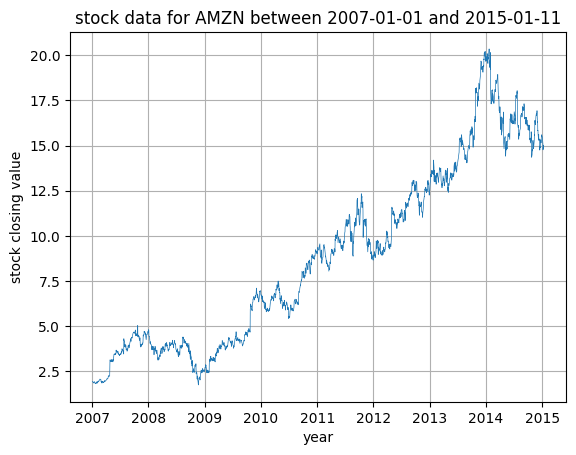

In [46]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('lines', linewidth=0.5) # para lineas delgaditas

plt.xlabel("year")
plt.ylabel("stock closing value")
plt.title(f"stock data for {ticker} between {start.date()} and {end.date()}");

close = stock["Close"]
plt.grid(True)
plt.plot(close)

## para volverla estacionaria aplicamos diff, log.
El log para la varianza
El dif para la media


In [47]:
N= close.size
N

2020

In [48]:
log_close = np.log(close)
log_close

Date
2007-01-03    0.660107
2007-01-04    0.665262
2007-01-05    0.651544
2007-01-08    0.628609
2007-01-09    0.636048
                ...   
2015-01-05    2.715324
2015-01-06    2.692226
2015-01-07    2.702770
2015-01-08    2.709582
2015-01-09    2.697764
Name: Close, Length: 2020, dtype: float64

In [49]:
diff_log_close = log_close.diff()
diff_log_close

Date
2007-01-03         NaN
2007-01-04    0.005155
2007-01-05   -0.013718
2007-01-08   -0.022935
2007-01-09    0.007439
                ...   
2015-01-05   -0.020731
2015-01-06   -0.023098
2015-01-07    0.010544
2015-01-08    0.006813
2015-01-09   -0.011818
Name: Close, Length: 2020, dtype: float64

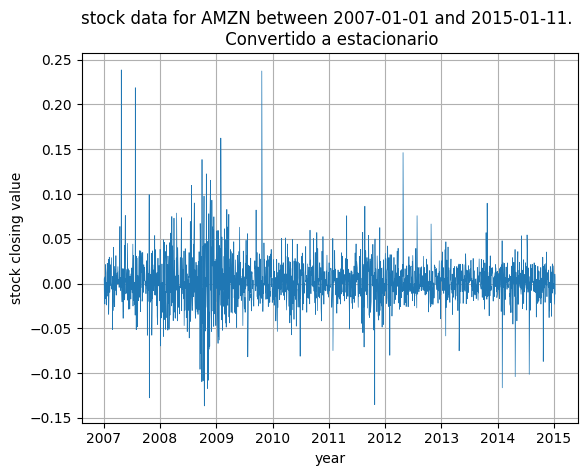

In [55]:
plt.xlabel("year")
plt.ylabel("stock closing value")
plt.title(f"stock data for {ticker} between {start.date()} and {end.date()}. \n Convertido a estacionario");

plt.grid(True)
plt.plot(diff_log_close)

# Modelo Autoregresivo Integrado con promedio desplazante. ARIMA(p, d, q):
Autoregressive Integrated Moving Average Process.

Es una generalizacion del ARMA(p,q). Donde la "I" quiere decir integrado,
la $d$ es un diferenciador. Es decir, si se tienen datos que no son estacionarios en la media y se pueden volver estacionarios mediante un diferenciador "d", entonces el modelo simplmente se puede presentar como un modelo ARIMA(p,d,q). 

La parte matematica, en terminos de backshift $B$

$$\left (  1 - \sum_{i=1}^p \phi_i B^i  \right ) (1 - B)^d X_t = \left (1 - \sum_{i=1}^q \beta_i B^i Z_t
    \right ) $$


De que orden es el diferenciador. Es decir cuanto vale $d$?
En lo que sigue vamos a tratar de predecir el modelo a partir de sus datos y el ACF y el PACF. 

* Si observamos un "trend" (tendencia) entonces el modelo no es estacionario. Se requiere hallar d el cual se puede hallar por "prueba error". Aplicando un barrido hasta hallar el "d" optimo. Si tiene varianza variante, se debe remover con los medios que explicamos hoy.

* Luego de que la serie sea estacionaria, se le pueden aplicar los metodos ACF, PACF. Con los siguientes diagnosticos:

    * Si no hay colas en el ACF se suquiere un modelo MA(q).
    * No nay colas en el PACF, se sugiere un AR(p)
    * Si hay colas en ambos es un ARMA(p,q).

En este sentido podemos tomar un doble "loop" sobre p y q para determinar
el modelo optimo. O mejor, un triple loop, donde inicialmente se determina "d" y luego en un doble loop se determinan p, y q. Al interior del doble loop se pueden examinar condiciones como:

    * Akaike Information Criterion (AIC)
    * Sum of squares errors (SSE) y
    * Ljung-Box Q-statistics

## Criterio para determinar del ACF si el proceso no es estacionario
Comencemos simple. AR(1), $X_t = \phi X_{t-1} + Z_t$.
Vimos que el ACF esta dado por

$$ \rho_{\tau} = \phi^{\tau} \quad , \quad | \phi | < 1 $$
si $\phi>0$ decae exponencialmente, si $\phi<0$, decae exponencialmente pero oscilando. 

Asumamos que el modelo es AR(1) + un proceso lineal.  Es decir
$$ X_t = \phi X_{t-1} + \alpha t + Z_t $$
donde $\alpha \in \mathbb{R}$. Como hemos hecho antes calculemos  el ACF
tomando productos con desplazamiento (shift).

$$ X_t X_{t - \tau} = \phi X_{t-1} X_{t - \tau} + \alpha t X_{t-\tau} + Z_t X_{t-\tau},$$
es decir

$$ \gamma_{\tau} = \mathbb{E}[X_t X_{t - \tau}] = \phi \mathbb{E}[X_{t-1} X_{t - \tau}] + \alpha \mathbb{E}[t X_{t - \tau}] + \mathbb{E}[Z_t X_{t- \tau}]. $$

Si $\tau=0$.

$$ \gamma_0 = \phi \gamma_1 + \alpha \mathbb{E}[t X_t] + \sigma_Z^2$$\tau

y si $\tau  > 0$.

$$ \gamma_{\tau} = \phi \gamma_{\tau-1} + \alpha \mathbb{E}[t X_{t-\tau}]$$

Normalizamos dividiendo por $\gamma_0$:

$$ \rho_{\tau} = \phi \rho_{\tau-1} + \alpha \frac{\mathbb{E}[t X_{t-\tau}]}{\gamma_0} $$

En la proxima clase analizamos estos resultados y hacemos un cuaderno en Jupyter.